In [1]:
import tensorflow as tf
import numpy as np
import os
import facenet
import matplotlib.pyplot as plt

/home/animesh/Programming/Projects/Potential_project/face_recognition/facenet/venv/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [3]:
facenet.load_model("../model_checkpoints/20180408-102900")

Model directory: ../model_checkpoints/20180408-102900
Metagraph file: model-20180408-102900.meta
Checkpoint file: model-20180408-102900.ckpt-90
INFO:tensorflow:Restoring parameters from ../model_checkpoints/20180408-102900/model-20180408-102900.ckpt-90


In [4]:
images_placeholder = tf.get_default_graph().get_tensor_by_name("input:0")
embeddings = tf.get_default_graph().get_tensor_by_name("embeddings:0")
phase_train_placeholder = tf.get_default_graph().get_tensor_by_name("phase_train:0")

In [5]:
images_placeholder, embeddings, phase_train_placeholder

(<tf.Tensor 'input:0' shape=(?, 160, 160, 3) dtype=float32>,
 <tf.Tensor 'embeddings:0' shape=(?, 512) dtype=float32>,
 <tf.Tensor 'phase_train:0' shape=<unknown> dtype=bool>)

## Obtain some images for testing ...

In [6]:
# use imageio to read the images
from imageio import imread
from scipy.misc import imresize

In [7]:
data_path = "../data/recognition/aligned"

In [8]:
imgs = []

for folder_name in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder_name)
    if os.path.isdir(folder_path):
        for img_file_name in os.listdir(folder_path):
            image_file = os.path.join(folder_path, img_file_name)
            img_array = imresize(np.array(imread(image_file)), size=(160, 160))

            imgs.append(img_array)

/home/animesh/Programming/Projects/Potential_project/face_recognition/facenet/venv/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [9]:
imgs = np.array(imgs)

In [10]:
imgs.shape

(12, 160, 160, 3)

#### view a couple of images 

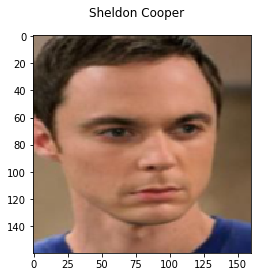

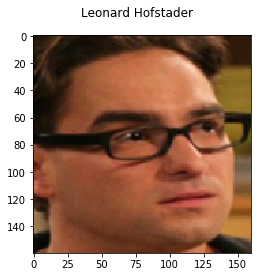

In [46]:
plt.figure().suptitle("Sheldon Cooper")
plt.imshow(imgs[0]);
plt.figure().suptitle("Leonard Hofstader")
plt.imshow(imgs[11]);

### Generate the embeddings for these 6 images

In [12]:
# now generate embeddings using all the images
embeds = sess.run(embeddings, feed_dict={images_placeholder: imgs, phase_train_placeholder: False})

In [13]:
embeds.shape

(12, 512)

In [24]:
emb = embeds[5]

In [25]:
# let's check if this is a unit vector
np.sum(emb ** 2)  # Hmmm ... alright this is indeed a unit vector

1.0

Define cosine similarity for x and y which are unit vectors

In [26]:
cosine = lambda x, y: np.sum(x * y)

In [29]:
euclidean = lambda x, y: np.sum(np.square(x - y))

In [44]:
cosine(embeds[2], embeds[11])

0.9902978

In [45]:
euclidean(embeds[0], embeds[11])

0.010394098

# This is weird! Why are the embeddings so close? Isn't the model trained already?